Case Study 3:
Present your findings on different techniques of anomaly detection and k means clustering. Use any sample
data and present your POV in a well-structured presentation

In [ ]:
import pandas as pd

df = pd.read_csv('/content/tip.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [ ]:
print("DataFrame Info:")
df.info()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [ ]:
categorical_cols = ['sex', 'smoker', 'day', 'time']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)
print("DataFrame after one-hot encoding:")
print(df_encoded.head())

DataFrame after one-hot encoding:
   total_bill   tip  size  sex_Female  sex_Male  smoker_No  smoker_Yes  \
0       16.99  1.01     2        True     False       True       False   
1       10.34  1.66     3       False      True       True       False   
2       21.01  3.50     3       False      True       True       False   
3       23.68  3.31     2       False      True       True       False   
4       24.59  3.61     4        True     False       True       False   

   day_Fri  day_Sat  day_Sun  day_Thur  time_Dinner  time_Lunch  
0    False    False     True     False         True       False  
1    False    False     True     False         True       False  
2    False    False     True     False         True       False  
3    False    False     True     False         True       False  
4    False    False     True     False         True       False  


In [ ]:
numerical_cols = ['total_bill', 'tip', 'size']
features_for_modeling = df_encoded[numerical_cols + list(df_encoded.columns.drop(df.columns))]
print("Features selected for modeling:")
print(features_for_modeling.head())


KeyError: "['sex', 'smoker', 'day', 'time'] not found in axis"

In [ ]:
numerical_cols = ['total_bill', 'tip', 'size']
# df_encoded already contains all necessary numerical and one-hot encoded features
features_for_modeling = df_encoded
print("Features selected for modeling:")
print(features_for_modeling.head())

Features selected for modeling:
   total_bill   tip  size  sex_Female  sex_Male  smoker_No  smoker_Yes  \
0       16.99  1.01     2        True     False       True       False   
1       10.34  1.66     3       False      True       True       False   
2       21.01  3.50     3       False      True       True       False   
3       23.68  3.31     2       False      True       True       False   
4       24.59  3.61     4        True     False       True       False   

   day_Fri  day_Sat  day_Sun  day_Thur  time_Dinner  time_Lunch  
0    False    False     True     False         True       False  
1    False    False     True     False         True       False  
2    False    False     True     False         True       False  
3    False    False     True     False         True       False  
4    False    False     True     False         True       False  


In [ ]:
from sklearn.ensemble import IsolationForest

# Instantiate the IsolationForest model
# contamination='auto' lets the model estimate the proportion of outliers in the data
# random_state for reproducibility
isolation_forest = IsolationForest(contamination='auto', random_state=42)

# Fit the model to the data and predict anomalies
isolation_forest.fit(features_for_modeling)
anomaly_predictions = isolation_forest.predict(features_for_modeling)

# Store the anomaly predictions in a new column in features_for_modeling
features_for_modeling['anomaly_isolation_forest'] = anomaly_predictions

print("Anomaly detection using Isolation Forest applied. Anomaly predictions stored in 'anomaly_isolation_forest' column.")
print("Number of anomalies detected (-1):", list(anomaly_predictions).count(-1))
print("Number of inliers detected (1):", list(anomaly_predictions).count(1))

Anomaly detection using Isolation Forest applied. Anomaly predictions stored in 'anomaly_isolation_forest' column.
Number of anomalies detected (-1): 95
Number of inliers detected (1): 149


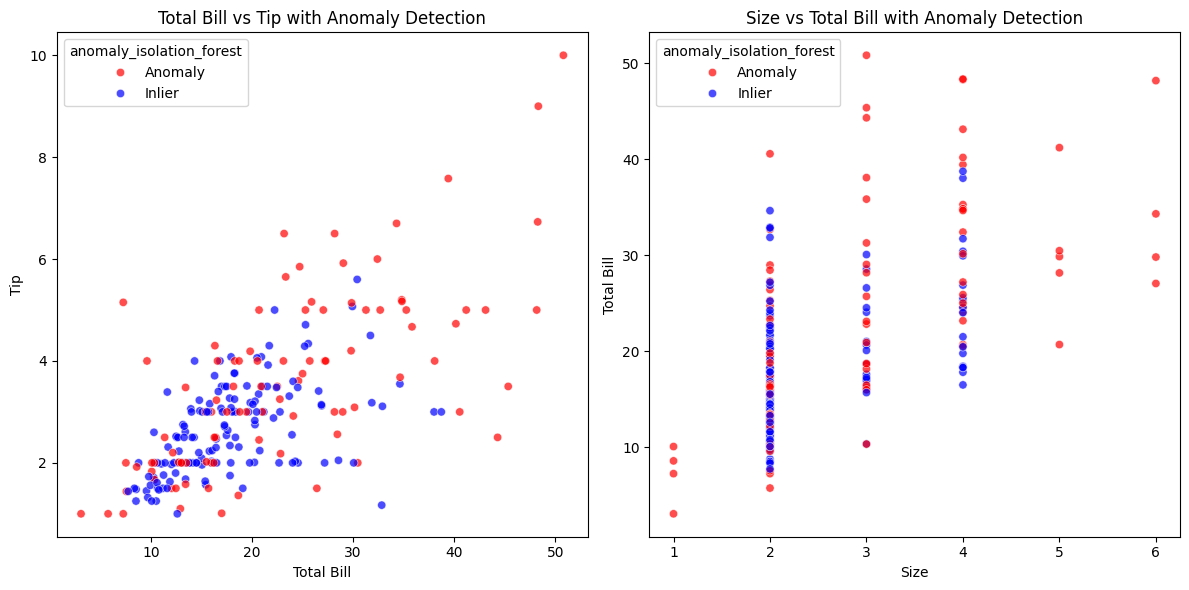

Visualized anomalies in 'total_bill' vs 'tip' and 'size' vs 'total_bill'.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a copy of the features_for_modeling DataFrame to avoid SettingWithCopyWarning
df_anomalies_plot = features_for_modeling.copy()

# Convert anomaly column to string for better legend labels
df_anomalies_plot['anomaly_isolation_forest'] = df_anomalies_plot['anomaly_isolation_forest'].map({1: 'Inlier', -1: 'Anomaly'})

# Visualize anomalies for 'total_bill' and 'tip'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_anomalies_plot, x='total_bill', y='tip', hue='anomaly_isolation_forest', palette={'Inlier': 'blue', 'Anomaly': 'red'}, alpha=0.7)
plt.title('Total Bill vs Tip with Anomaly Detection')
plt.xlabel('Total Bill')
plt.ylabel('Tip')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_anomalies_plot, x='size', y='total_bill', hue='anomaly_isolation_forest', palette={'Inlier': 'blue', 'Anomaly': 'red'}, alpha=0.7)
plt.title('Size vs Total Bill with Anomaly Detection')
plt.xlabel('Size')
plt.ylabel('Total Bill')

plt.tight_layout()
plt.show()

print("Visualized anomalies in 'total_bill' vs 'tip' and 'size' vs 'total_bill'.")

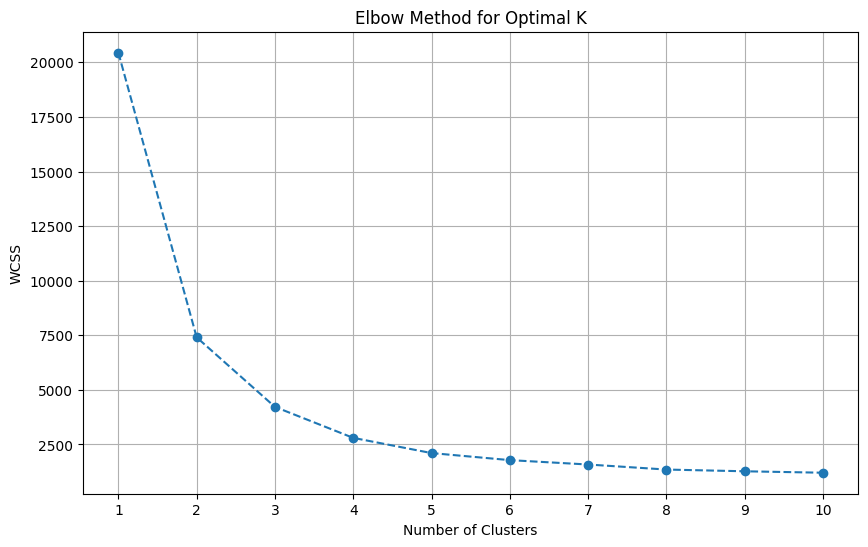

Elbow method plot generated to determine optimal number of clusters.


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
# Iterate for a range of k values (e.g., 1 to 10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(features_for_modeling.drop(columns=['anomaly_isolation_forest']))
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

print("Elbow method plot generated to determine optimal number of clusters.")

In [ ]:
optimal_k = 3  # Based on the elbow plot, 3 or 4 seems to be a reasonable choice

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
kmeans.fit(features_for_modeling.drop(columns=['anomaly_isolation_forest']))

features_for_modeling['cluster_label'] = kmeans.predict(features_for_modeling.drop(columns=['anomaly_isolation_forest']))

print(f"K-Means clustering applied with {optimal_k} clusters.")
print("First 5 rows with cluster labels:")
print(features_for_modeling.head())

K-Means clustering applied with 3 clusters.
First 5 rows with cluster labels:
   total_bill   tip  size  sex_Female  sex_Male  smoker_No  smoker_Yes  \
0       16.99  1.01     2        True     False       True       False   
1       10.34  1.66     3       False      True       True       False   
2       21.01  3.50     3       False      True       True       False   
3       23.68  3.31     2       False      True       True       False   
4       24.59  3.61     4        True     False       True       False   

   day_Fri  day_Sat  day_Sun  day_Thur  time_Dinner  time_Lunch  \
0    False    False     True     False         True       False   
1    False    False     True     False         True       False   
2    False    False     True     False         True       False   
3    False    False     True     False         True       False   
4    False    False     True     False         True       False   

   anomaly_isolation_forest  cluster_label  
0                        -1  

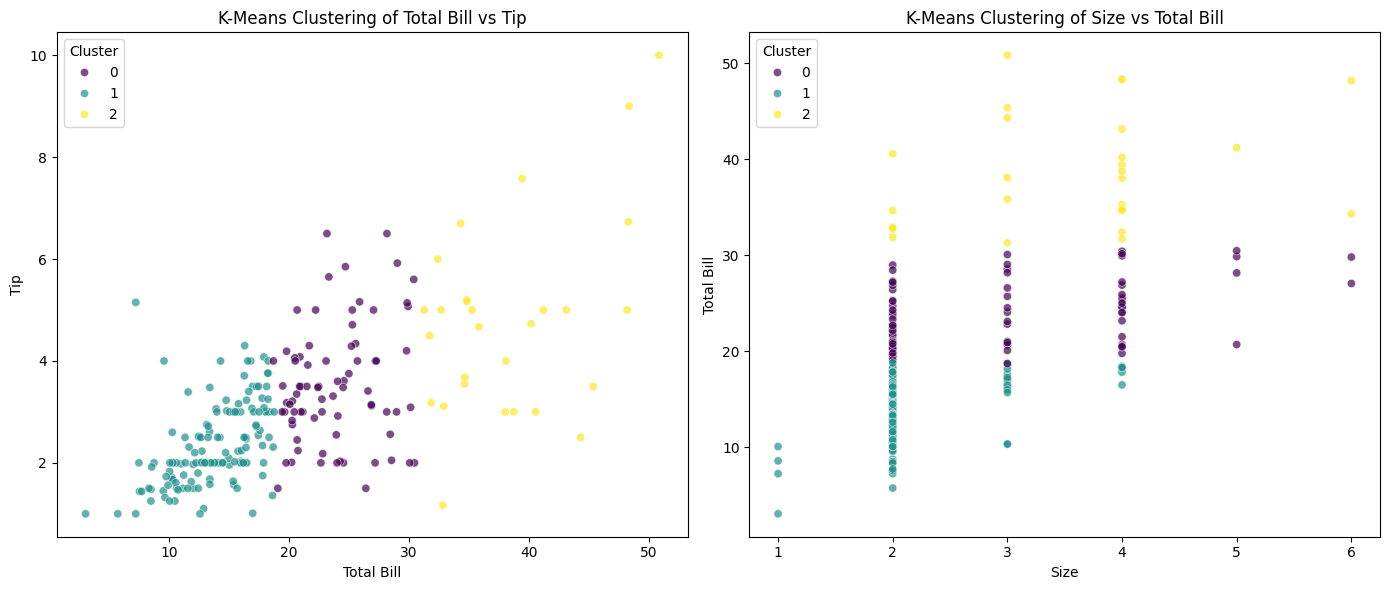

Visualized K-Means clusters for 'total_bill' vs 'tip' and 'size' vs 'total_bill'.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a copy of the features_for_modeling DataFrame to avoid SettingWithCopyWarning
df_clusters_plot = features_for_modeling.copy()

# Visualize clusters for 'total_bill' and 'tip'
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_clusters_plot, x='total_bill', y='tip', hue='cluster_label', palette='viridis', alpha=0.7)
plt.title('K-Means Clustering of Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.legend(title='Cluster')

# Visualize clusters for 'size' and 'total_bill'
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_clusters_plot, x='size', y='total_bill', hue='cluster_label', palette='viridis', alpha=0.7)
plt.title('K-Means Clustering of Size vs Total Bill')
plt.xlabel('Size')
plt.ylabel('Total Bill')
plt.legend(title='Cluster')

plt.tight_layout()
plt.show()

print("Visualized K-Means clusters for 'total_bill' vs 'tip' and 'size' vs 'total_bill'.")